# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [35]:
import importlib
import funciones as func
importlib.reload(func)

<module 'funciones' from 'c:\\Users\\javil\\OneDrive\\Escritorio\\KEEPCODING\\mlops\\practica\\funciones.py'>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [5]:
df = func.load_data()

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
df.shape


(178, 14)

Vemos que el dataset presenta `178` *muestras* y `14` *características*

# Dataset Wine - Descripción

| Nº  | Columna                         | Descripción                                                                 |
|-----|---------------------------------|-----------------------------------------------------------------------------|
| 1   | `Alcohol`                       | Contenido de alcohol en el vino                                            |
| 2   | `Malic acid`                    | Ácido málico (g/l)                                                         |
| 3   | `Ash`                           | Cenizas — contenido mineral no orgánico (g/l)                              |
| 4   | `Alcalinity of ash`            | Alcalinidad de las cenizas (como carbonato de potasio)                     |
| 5   | `Magnesium`                    | Magnesio (mg/l)                                                            |
| 6   | `Total phenols`                | Fenoles totales — compuestos responsables del sabor y color                |
| 7   | `Flavanoids`                   | Tipo de fenoles que afectan el sabor y color                               |
| 8   | `Nonflavanoid phenols`         | Fenoles no flavonoides                                                     |
| 9   | `Proanthocyanins`              | Tipo de taninos (afectan astringencia y sabor)                             |
| 10  | `Color intensity`              | Intensidad del color del vino                                              |
| 11  | `Hue`                          | Matiz del color — relación entre absorbancias a 420 nm y 520 nm            |
| 12  | `OD280/OD315 of diluted wines` | Índice de absorbancia que mide la cantidad de polifenoles                  |
| 13  | `Proline`                      | Prolina — aminoácido relacionado con el sabor (mg/l)                       |
| 14  | `target`                       | Clase del vino, es decir, a qué variedad pertenece (0, 1 o 2).             |


El dataset no presenta NaNs, todas las carácterísticas son numéricas.

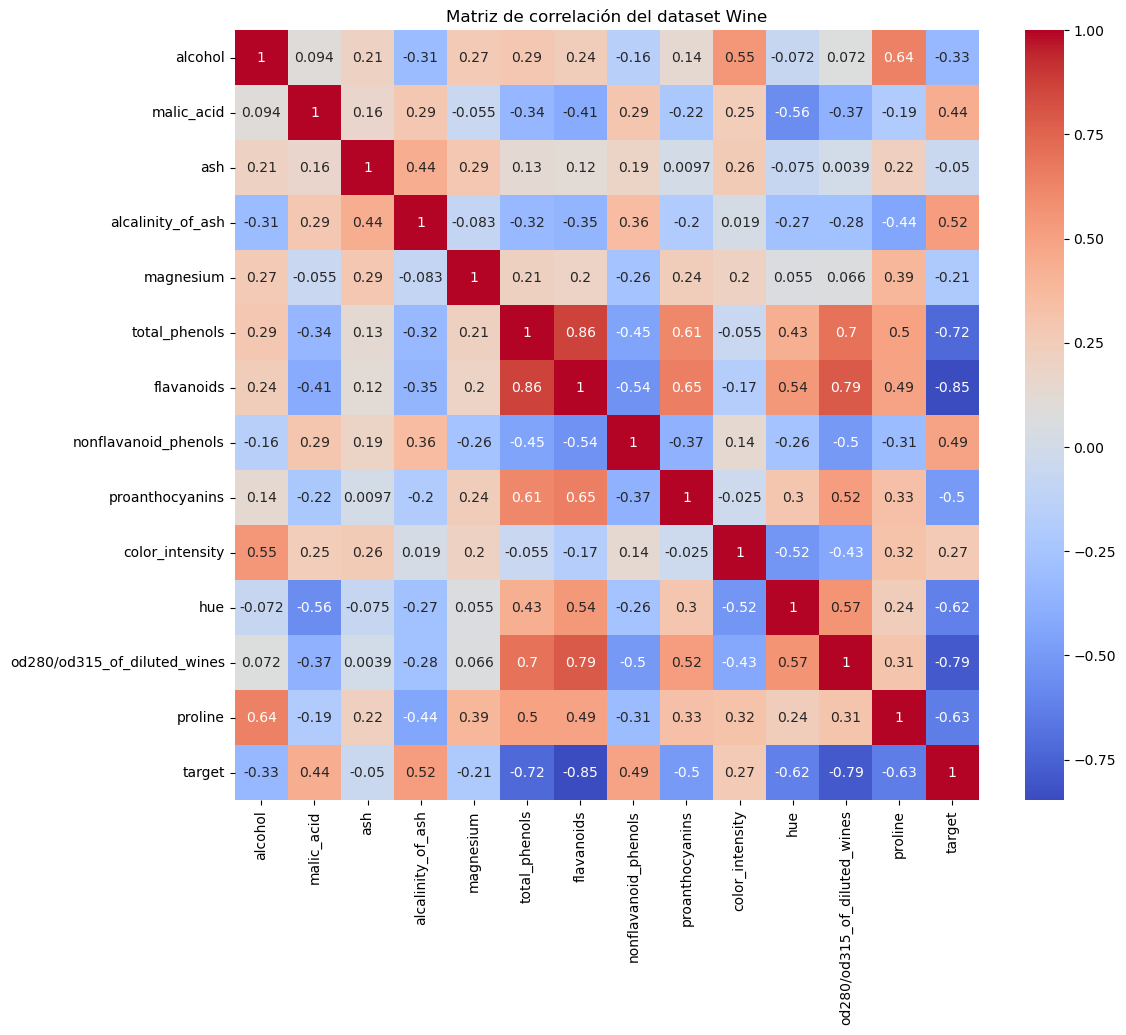

In [27]:
func.corr_matrix(df)

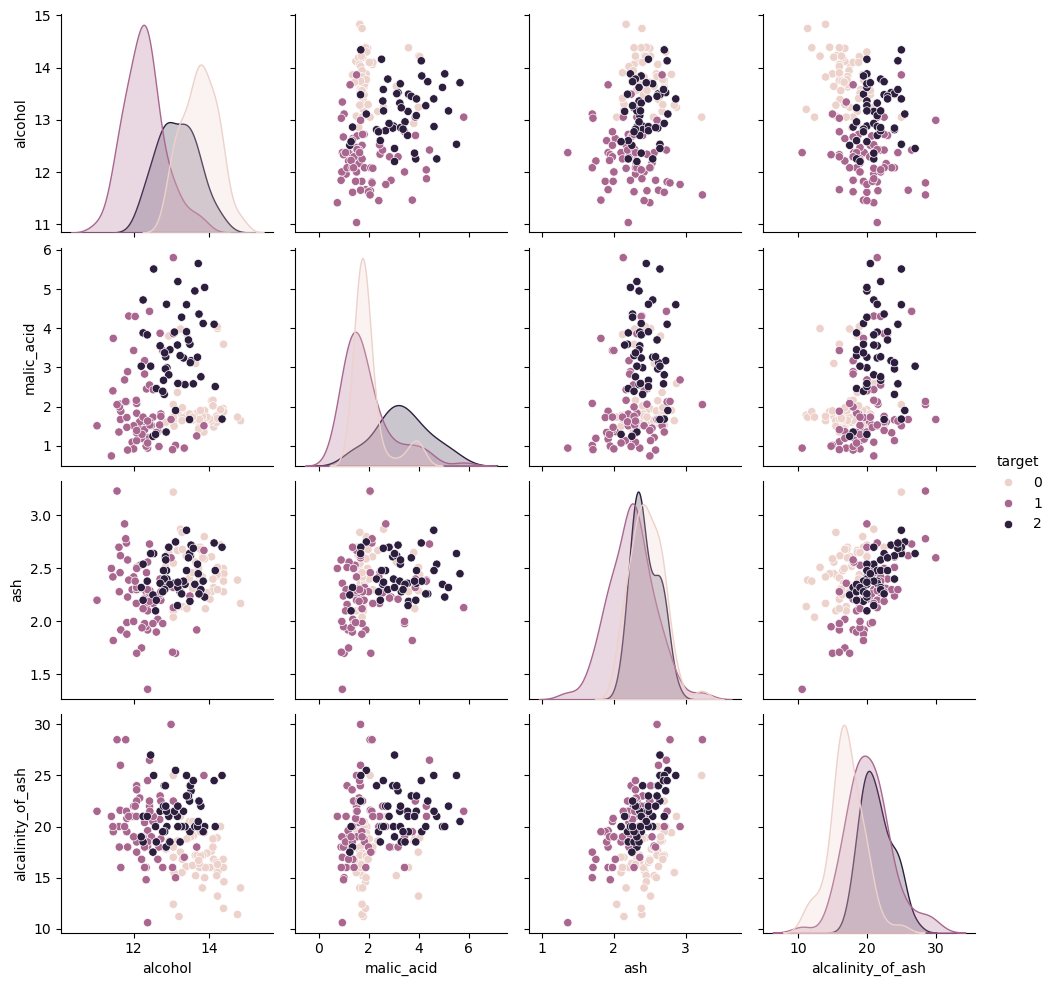

In [25]:
func.d_pares(df)

In [36]:
X_train, X_test, y_train, y_test = func.split_wine_data(df)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Generar .py de funciones y main con al menos dos argumentos de entrada.

## main.py

In [ ]:
import funciones as func

def main():

    df = func.load_data()
    x_train, x_test, y_train, y_test = func.split_wine_data(df)
    func.mlflow_tracking_xgboost('XGBoost',
                                 x_train, x_test, y_train, y_test,
                                 n_estimators=[100, 300])
    
if __name__ == '__main__':
    main()

## funciones.py

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_wine
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score


## función carga dataset
def load_data():
    wine = load_wine()
    df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
    df['target'] = wine['target']
    return df


## función matriz de correlación
def corr_matrix(df):

    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Matriz de correlación del dataset Wine")
    plt.show()

## función de histogramas
def histogram(df):

    for col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=col, hue='target', kde=True, element='step')
        plt.title(f'Distribución de {col} por clase')
        plt.show()

## función de diagrama de pares
def d_pares(df):
    sns.pairplot(df, hue='target', vars=df.columns[:4])
    plt.show()


## función separa datos
def split_wine_data(df):
    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test



def mlflow_tracking_xgboost(nombre_job, x_train, x_test, y_train, y_test, n_estimators):
    mlflow.set_experiment(nombre_job)

    for n in n_estimators:
        with mlflow.start_run(run_name=f"xgb_{n}"):
            xgb = XGBRegressor(
                n_estimators=n,
                learning_rate=0.1,
                max_depth=3,
                subsample=0.8,
                colsample_bytree=0.8,
                objective='reg:squarederror',
                n_jobs=-1
            )

            xgb.fit(x_train, y_train)

            y_pred_train = xgb.predict(x_train)
            y_pred_test = xgb.predict(x_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            r2_test = r2_score(y_test, y_pred_test)

            mlflow.log_param('n_estimators', n)
            mlflow.log_metrics({
                'rmse_train': rmse_train,
                'rmse_test': rmse_test,
                'r2_test': r2_test
            })

            mlflow.sklearn.log_model(xgb, artifact_path='xgb_model')

    print("Entrenamiento XGBoost terminado correctamente")


## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run